In [1]:
#import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.simplefilter(action='ignore')


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


### Understand the data set

In [4]:
#load the data set

In [5]:
titanic_df=pd.read_excel('titanic.xls')


### Exploring the data

In [6]:
#expore the data 
#1)Identify input features and target/output feature
#2)Identify the data types of variables

In [7]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [8]:
titanic_df.shape

(1309, 14)

In [9]:
titanic_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [10]:
#rename the column home.dest as destination

In [11]:
titanic_df=titanic_df.rename(columns={'home.dest':'destination'})

In [12]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [13]:
X=titanic_df.loc[:,titanic_df.columns!='Survived']
y=titanic_df['survived']

In [14]:
#print the input variables and the target variable

In [15]:
print('Input variables:',list(X.columns))
print('Output variable:',"['survived']")

Input variables: ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'destination']
Output variable: ['survived']


In [16]:
#identify data types of the variables

In [17]:
titanic_df.dtypes.sort_values()

pclass           int64
survived         int64
sibsp            int64
parch            int64
age            float64
fare           float64
body           float64
name            object
sex             object
ticket          object
cabin           object
embarked        object
boat            object
destination     object
dtype: object

In [18]:
num_col=titanic_df.select_dtypes(include=[np.number])
cat_col=titanic_df.select_dtypes(include=[np.object])

In [19]:
print('Numerical Columns:',list(num_col.columns))
print('Categorical Columns:',list(cat_col.columns))

Numerical Columns: ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']
Categorical Columns: ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'destination']


In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   name         1309 non-null   object 
 3   sex          1309 non-null   object 
 4   age          1046 non-null   float64
 5   sibsp        1309 non-null   int64  
 6   parch        1309 non-null   int64  
 7   ticket       1309 non-null   object 
 8   fare         1308 non-null   float64
 9   cabin        295 non-null    object 
 10  embarked     1307 non-null   object 
 11  boat         486 non-null    object 
 12  body         121 non-null    float64
 13  destination  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [21]:
# Dropping the irrelevant columns


In [22]:
titanic_df.drop(["name","ticket","boat","body","destination"],axis=1,inplace=True)

## Univariate Analysis
#### . Explore the variable one by one
#### . Methods to perform univariate analysis depends on whether the variable is categorical or numerical
### Continuous variable analysis
#### . Measure of central tendancy (mean,median,mode) of the variable
#### .Measure of spread ( range, IQR, varaince, standard deviation) of the variable
#### . Measure of shape(skewedness and kurtosis) 
### Categorical variable analysis
#### . use the frequency distribution of each category 

In [23]:
#descriptive statistics of numerical data types

In [24]:
titanic_df.describe(include=[np.number])

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [25]:
#Analysis of target variable 'survived'

In [26]:
#calculate percentage of people who survived and not survived

In [27]:
titanic_df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [28]:
(titanic_df['survived'].value_counts()/titanic_df.shape[0]*100).round(2)


0    61.8
1    38.2
Name: survived, dtype: float64

In [29]:
#plot the graph between who are survied and not survived as per the column data

In [30]:
#display count on the top of the countplot

Figure(360x360)
AxesSubplot(0.125,0.125;0.775x0.755)


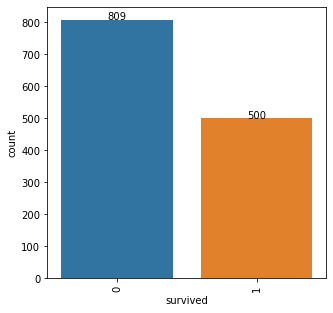

In [31]:
fig,ax1=plt.subplots(figsize=(5,5))
print(fig)
print(ax1)
graph=sns.countplot(ax=ax1,x='survived',data=titanic_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x() + p.get_width()/2,height+0.1,height,ha="center")

In [32]:
#display percentage

In [33]:
from matplotlib.pyplot import show

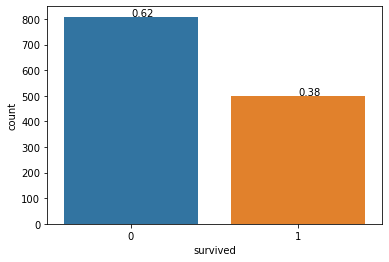

In [34]:
ax=sns.countplot(x='survived',data=titanic_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/len(titanic_df),ha='center'))

In [35]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [36]:
#univariate analysis for each variable

<AxesSubplot:xlabel='age', ylabel='Density'>

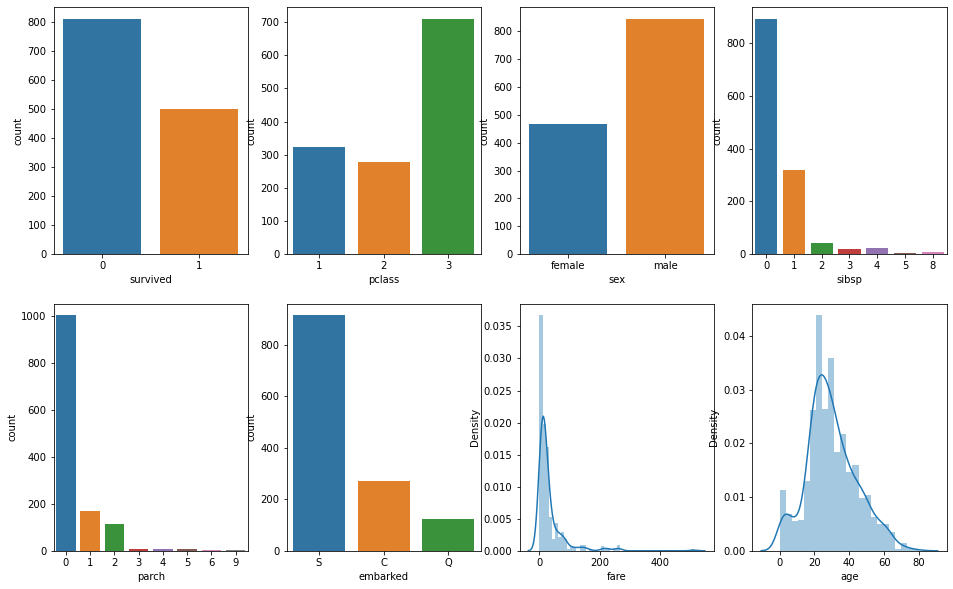

In [37]:
fig,axes=plt.subplots(2,4,figsize=(16,10))
sns.countplot('survived',data=titanic_df,ax=axes[0][0])
sns.countplot('pclass',data=titanic_df,ax=axes[0][1])
sns.countplot('sex',data=titanic_df,ax=axes[0][2])
sns.countplot('sibsp',data=titanic_df,ax=axes[0][3])
sns.countplot('parch',data=titanic_df,ax=axes[1][0])
sns.countplot('embarked',data=titanic_df,ax=axes[1][1])
sns.distplot(titanic_df['fare'],kde=True,ax=axes[1][2])
sns.distplot(titanic_df['age'].dropna(),kde=True,ax=axes[1][3])


## Bivariate Analysis
#### . analzing two variables of any combination 
#### . The combination can be categorical & categorical , categorical&numerical , numerical&numerical

In [38]:
#survived Vs sex columns using catplot or countplot

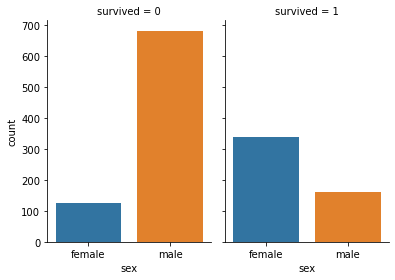

In [39]:
sns.catplot(x='sex',col='survived',data=titanic_df,kind='count',height=4,aspect=.7)

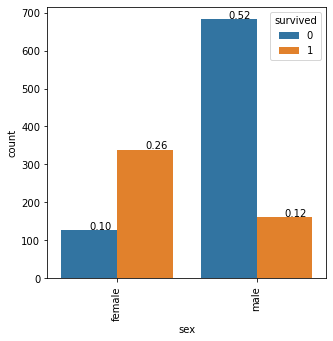

In [40]:
fig,ax1=plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='sex',hue='survived',data=titanic_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/len(titanic_df['sex']),ha='center'))

In [41]:
#survived Vs Pclass

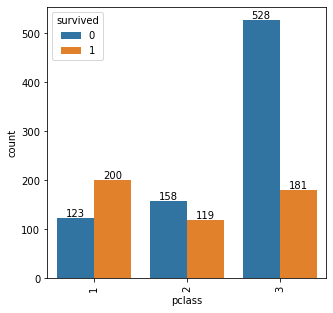

In [42]:
fig,ax1=plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='pclass',hue='survived',data=titanic_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+3,height,ha='center')

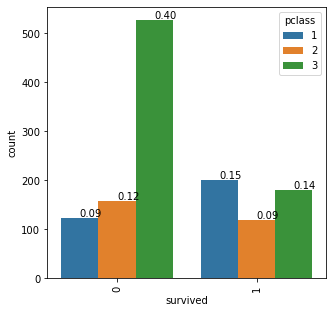

In [43]:
fig,ax1=plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='survived',hue='pclass',data=titanic_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/len(titanic_df['pclass']),ha='center'))

In [44]:
#sibling Vs sex 

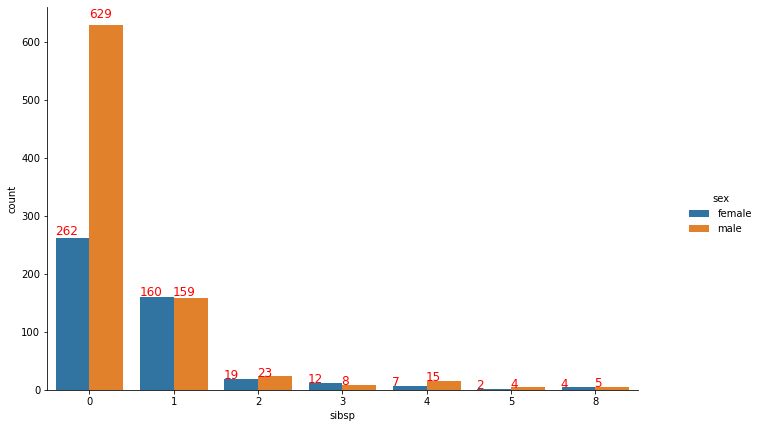

In [45]:
g=sns.catplot(data=titanic_df,x='sibsp',hue='sex',kind='count',height=4,legend=True)
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=0.81,right=0.86)
ax=g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.01,
            p.get_height()*1.02,
            '{0:.0f}'.format(p.get_height()),
            color='red',
            rotation='horizontal',
            size='large')

In [46]:
#survived Vs age

<AxesSubplot:title={'center':'age'}, xlabel='survived'>

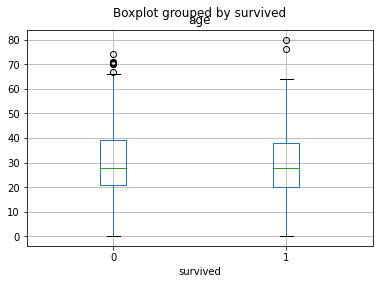

In [47]:
titanic_df.boxplot(column='age',by='survived')

In [48]:
#boxplot between survived and Fare

In [49]:
import matplotlib.patheffects as path_effects

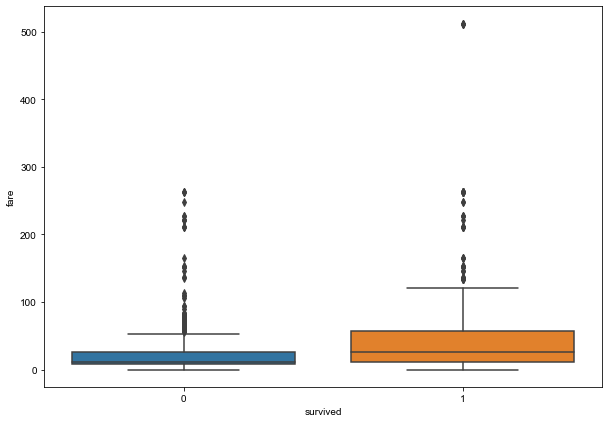

In [50]:
fig,ax1=plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')
tips=titanic_df
showfliers=True
box_plot=sns.boxplot(ax=ax1,x='survived',y='fare',data=titanic_df,showfliers=showfliers)

In [51]:
#continuous variable vs continuous variable

In [52]:
#plot fare distribution accross age using scatter plot

<AxesSubplot:xlabel='age', ylabel='fare'>

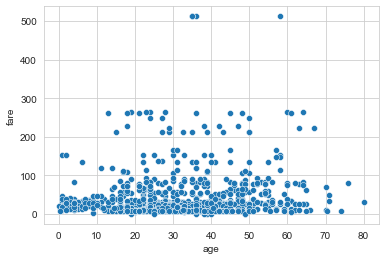

In [53]:
sns.scatterplot(x=titanic_df['age'],y=titanic_df['fare'])

In [54]:
#plot fare distribution accoss age using joint plot

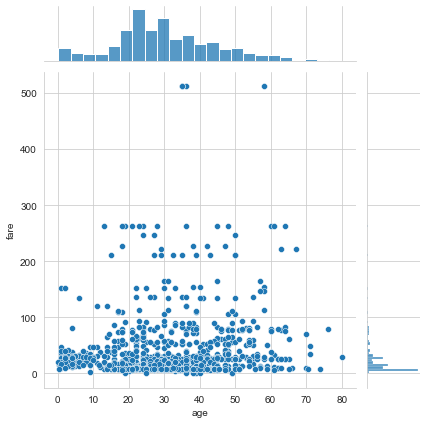

In [55]:
sns.jointplot(x='age',y='fare',data=titanic_df)

## Multivariate analysis
#### . we perform multivariate analysis with more than two variables for any combination of categorical and continuous variables
#### . The combination can be categorical & categorical , categorical & numerical, numerical&numerical

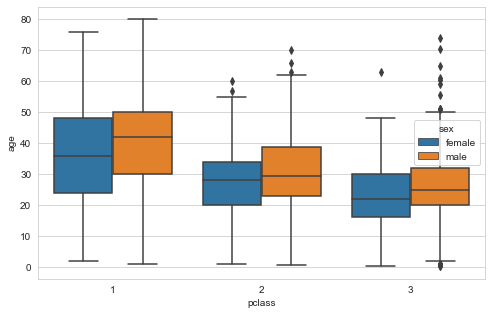

In [56]:
fig,ax1=plt.subplots(figsize=(8,5))
testplot=sns.boxplot(ax=ax1, x='pclass',y='age',hue='sex',data=titanic_df)

In [57]:
#elaborate survived data with pclass and sex using catplot

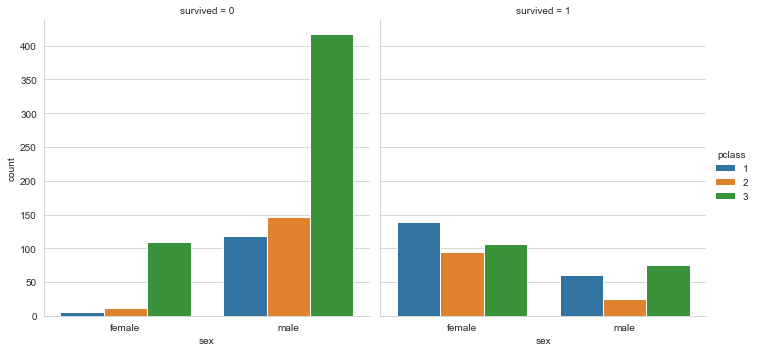

In [58]:
sns.catplot(data=titanic_df,col='survived',x='sex',hue='pclass',kind='count',legend=True)


In [59]:
#box plot between pclass, age,sex

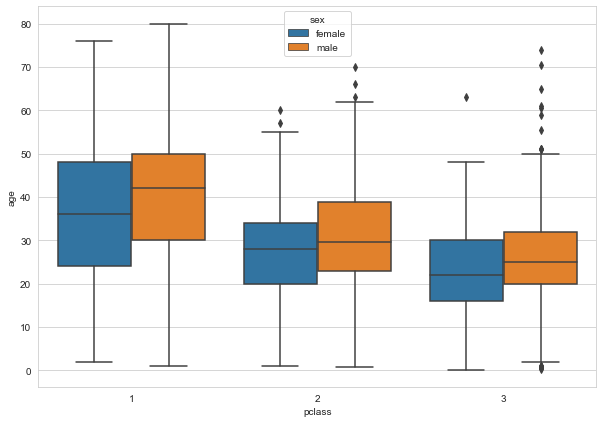

In [60]:
fig,ax1=plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')
tips=titanic_df
showfliers=True
box_plot=sns.boxplot(ax=ax1,x='pclass',y='age',hue='sex',data=titanic_df,showfliers=showfliers)

In [61]:
#correlation matrix

<AxesSubplot:>

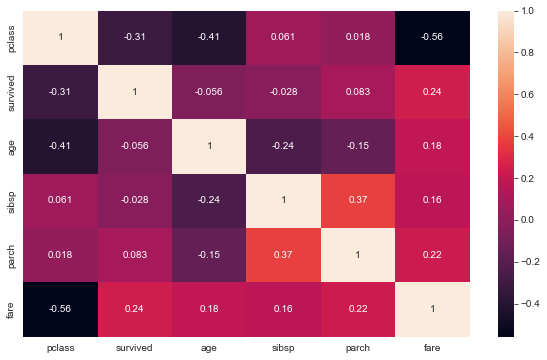

In [62]:
fig,ax=plt.subplots(figsize=(10,6))
corr=titanic_df.corr()
sns.heatmap(corr,annot=True)

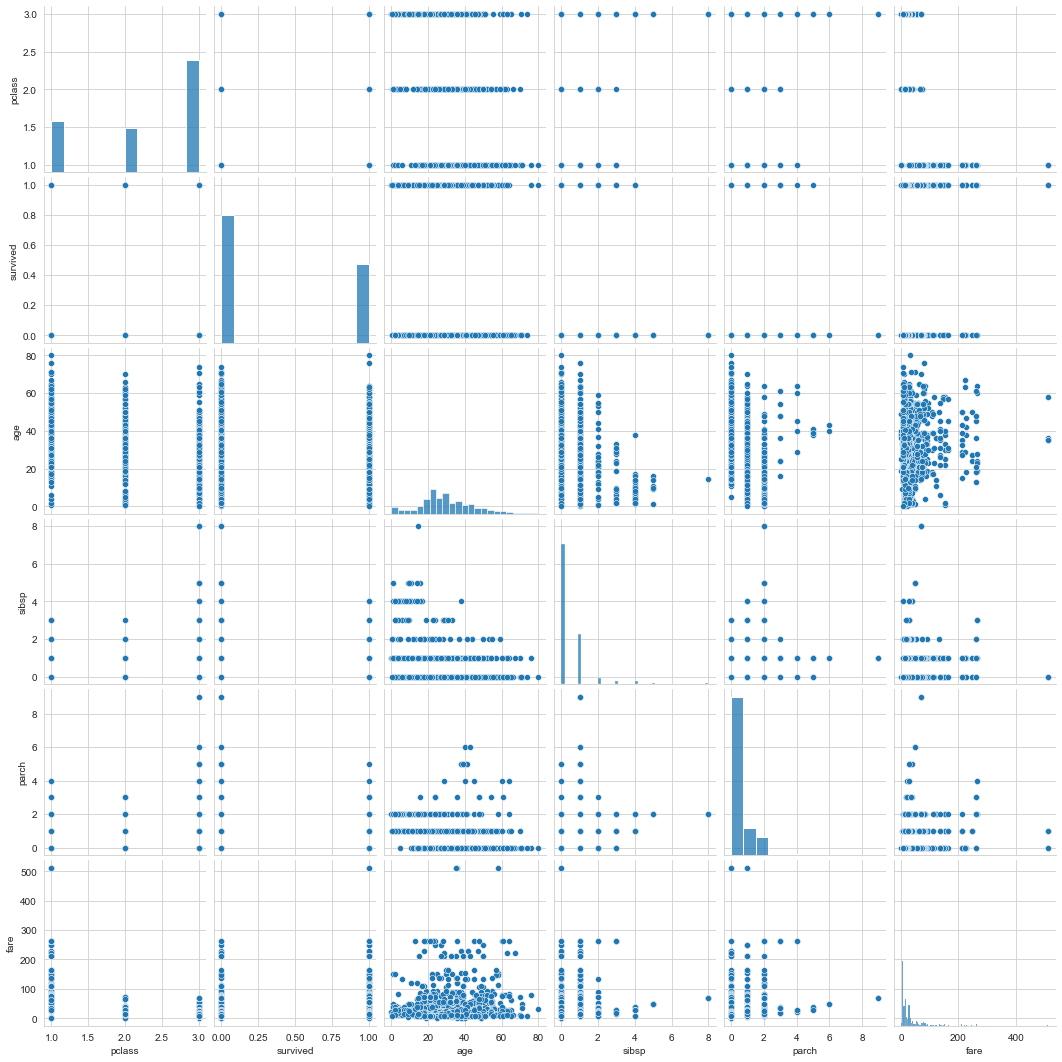

In [63]:
sns.pairplot(titanic_df)

### Data Cleaning

#### Handling Duplicate Data

In [64]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset
titanic_df.duplicated().sum()

185

#### Outlier Detection


#### There are different ways and methods of identifying outliers
 *  Visualization
 * Skewness
 * Interquartile Range
 * Standard Deviation



In [65]:
#box plot of fare variable

<AxesSubplot:xlabel='fare'>

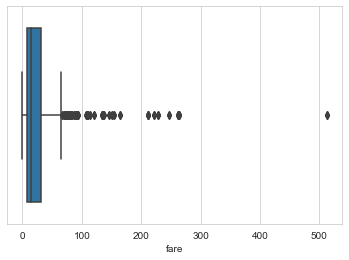

In [66]:
sns.boxplot(titanic_df['fare'])

In [67]:
#histogram of fare variable

<AxesSubplot:>

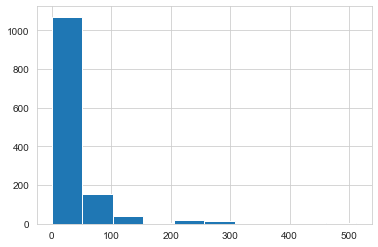

In [68]:
titanic_df['fare'].hist()

In [69]:
#skewness of fare variable

In [70]:
print('skewness value of Age: ',titanic_df['age'].skew())
print('skewness value of Fare: ',titanic_df['fare'].skew()) # the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

skewness value of Age:  0.4076718864978293
skewness value of Fare:  4.367709134122922


In [71]:
Q1 = titanic_df['fare'].quantile(0.25)
Q3 = titanic_df['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
fare_outliers = titanic_df[(titanic_df['fare'] < Q1 - whisker_width*IQR) | (titanic_df['fare'] > Q3 + whisker_width*IQR)]
fare_outliers.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22 C26,S
2,1,0,female,2.0000,1,2,151.5500,C22 C26,S
3,1,0,male,30.0000,1,2,151.5500,C22 C26,S
4,1,0,female,25.0000,1,2,151.5500,C22 C26,S


In [72]:
len(fare_outliers)

171

In [73]:
fare_mean = titanic_df['fare'].mean()
fare_std = titanic_df['fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = titanic_df[(titanic_df['fare'] < low) | (titanic_df['fare'] > high)]
fare_outliers.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0,0,0,211.3375,B5,S
10,1,0,male,47.0,1,0,227.5250,C62 C64,C
11,1,1,female,18.0,1,0,227.5250,C62 C64,C
16,1,0,male,24.0,0,1,247.5208,B58 B60,C
17,1,1,female,50.0,0,1,247.5208,B58 B60,C


In [74]:
len(fare_outliers)

38

#### Outliers Treatment
* Flooring and Capping.
* Trimming.
* Replacing outliers with the mean, median, mode, or other values.

In [75]:
""" drop the outliers by removing all the values that are below the 25th percentile and 
    above the 75th percentile of the ‘fare’ variable.""" 

' drop the outliers by removing all the values that are below the 25th percentile and \n    above the 75th percentile of the ‘fare’ variable.'

In [76]:
""" Q1 = titanic_df['fare'].quantile(0.25)
Q3 = titanic_df['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
titanic_df['fare']=np.where( titanic_df['fare']>upper_whisker,upper_whisker,
                            np.where(titanic_df['fare']<lower_whisker,lower_whisker,titanic_df['fare'])) """

" Q1 = titanic_df['fare'].quantile(0.25)\nQ3 = titanic_df['fare'].quantile(0.75)\nIQR = Q3 - Q1\nwhisker_width = 1.5\nlower_whisker = Q1 -(whisker_width*IQR)\nupper_whisker = Q3 + (whisker_width*IQR)\ntitanic_df['fare']=np.where( titanic_df['fare']>upper_whisker,upper_whisker,\n                            np.where(titanic_df['fare']<lower_whisker,lower_whisker,titanic_df['fare'])) "

<AxesSubplot:xlabel='fare'>

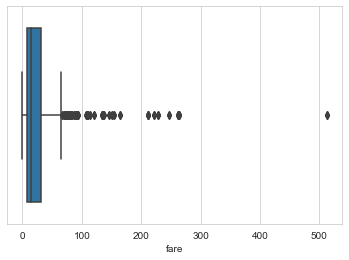

In [77]:
sns.boxplot(titanic_df['fare'],data=titanic_df)

In [78]:
#create an index for all data points and drop the index values

In [79]:
Q1 = titanic_df['fare'].quantile(0.10)
Q3 = titanic_df['fare'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=titanic_df['fare'][(titanic_df['fare']>upper_whisker)|(titanic_df['fare']<lower_whisker)].index

In [80]:
titanic_df.drop(index,inplace=True)

In [81]:
titanic_df.shape

(1271, 9)

<AxesSubplot:xlabel='fare'>

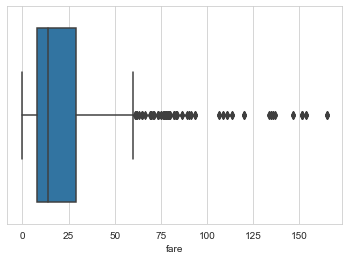

In [82]:
sns.boxplot(titanic_df['fare'],data=titanic_df)

In [83]:
titanic_df.shape

(1271, 9)

#### Handling missing value (Categorical Data and Numerical Data)

In [84]:
titanic_df.isnull().sum()

pclass         0
survived       0
sex            0
age          261
sibsp          0
parch          0
fare           1
cabin       1009
embarked       2
dtype: int64

<AxesSubplot:>

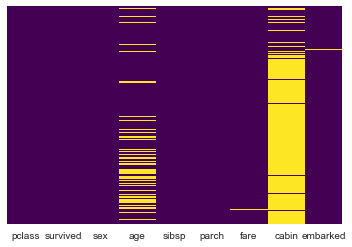

In [85]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False, cmap="viridis")
# From the below graph it is cleary visible that most of the null values are available in colun AGE and CABIN

In [86]:
# lets find out the percentage of misssing vale in each column
percent_missing =titanic_df.isnull().sum()  / len(titanic_df) * 100
missing_value_df = pd.DataFrame({'column_name': titanic_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
pclass,pclass,0.000000
survived,survived,0.000000
sex,sex,0.000000
age,age,20.535012
sibsp,sibsp,0.000000
parch,parch,0.000000
fare,fare,0.078678
cabin,cabin,79.386310
embarked,embarked,0.157356


In [87]:
titanic_df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked'],
      dtype='object')

In [88]:
titanic_df.isnull().sum()

pclass         0
survived       0
sex            0
age          261
sibsp          0
parch          0
fare           1
cabin       1009
embarked       2
dtype: int64

### Handling missing values

#### Age - Missing Values

In [89]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((titanic_df['age'].isnull().sum()/titanic_df.shape[0])*100))

Percent of missing "Age" records is 20.54%


In [90]:
titanic_df[titanic_df["age"].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
15,1,0,male,NaN,0,0,25.9250,NaN,S
37,1,1,male,NaN,0,0,26.5500,NaN,S
40,1,0,male,NaN,0,0,39.6000,NaN,C
46,1,0,male,NaN,0,0,31.0000,NaN,S
59,1,1,female,NaN,0,0,27.7208,NaN,C
69,1,1,female,NaN,0,1,55.0000,E33,S
70,1,0,male,NaN,0,0,0.0000,NaN,S
74,1,0,male,NaN,0,0,52.0000,A14,S
80,1,0,male,NaN,0,0,26.5500,NaN,S
107,1,1,female,NaN,0,0,31.6833,NaN,S


In [91]:
titanic_df["age"].fillna(titanic_df["age"].median(skipna=True), inplace=True)


#### Cabin - Missing values

In [92]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((titanic_df['cabin'].isnull().sum()/titanic_df.shape[0])*100))

Percent of missing "Cabin" records is 79.39%


In [93]:
titanic_df.drop('cabin', axis=1, inplace=True)

#### Emabarked - Missing Values

In [94]:
titanic_df[titanic_df["embarked"].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
168,1,1,female,38.0,0,0,80.0,NaN
284,1,1,female,62.0,0,0,80.0,NaN


In [95]:
titanic_df['embarked'].value_counts()

S    900
C    246
Q    123
Name: embarked, dtype: int64

In [96]:
titanic_df["embarked"].fillna(titanic_df['embarked'].value_counts().idxmax(), inplace=True)

#### Fare - Missing Values

In [97]:
titanic_df[titanic_df["fare"].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1225,3,0,male,60.5,0,0,NaN,S


In [98]:
titanic_df.iloc[1220:1230]['fare']

1258    15.2458
1259     7.8958
1260     9.8417
1261     9.5875
1262    14.5000
1263    14.5000
1264    14.5000
1265    24.1500
1266    24.1500
1267    24.1500
Name: fare, dtype: float64

In [99]:
titanic_df['fare'].fillna(method='ffill', inplace=True)

In [100]:
titanic_df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### Feature Encoding

#### Feature Encoding of Nominal  Features
* 

In [101]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2.0000,1,2,151.55,S
3,1,0,male,30.0000,1,2,151.55,S
4,1,0,female,25.0000,1,2,151.55,S
5,1,1,male,48.0000,0,0,26.55,S


In [102]:
titanic_df.tail()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1304,3,0,female,14.5,1,0,14.4542,C
1305,3,0,female,28.0,1,0,14.4542,C
1306,3,0,male,26.5,0,0,7.2250,C
1307,3,0,male,27.0,0,0,7.2250,C
1308,3,0,male,29.0,0,0,7.8750,S


In [103]:
titanic_df = pd.get_dummies(titanic_df, columns=["sex"])

In [104]:
titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,embarked,sex_female,sex_male
1,1,1,0.9167,1,2,151.55,S,0,1
2,1,0,2.0000,1,2,151.55,S,1,0
3,1,0,30.0000,1,2,151.55,S,0,1
4,1,0,25.0000,1,2,151.55,S,1,0
5,1,1,48.0000,0,0,26.55,S,0,1


In [105]:
titanic_df = pd.get_dummies(titanic_df, columns=["embarked"])


In [106]:
titanic_df.tail()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1304,3,0,14.5,1,0,14.4542,1,0,1,0,0
1305,3,0,28.0,1,0,14.4542,1,0,1,0,0
1306,3,0,26.5,0,0,7.2250,0,1,1,0,0
1307,3,0,27.0,0,0,7.2250,0,1,1,0,0
1308,3,0,29.0,0,0,7.8750,0,1,0,0,1


### Splitting data into train and test data

In [107]:
titanic_df.head(2)

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,1,0.9167,1,2,151.55,0,1,0,0,1
2,1,0,2.0000,1,2,151.55,1,0,0,0,1


In [108]:
X=titanic_df.drop(['survived'],axis=1)
y=titanic_df['survived']

In [109]:
X.head(2)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,0.9167,1,2,151.55,0,1,0,0,1
2,1,2.0000,1,2,151.55,1,0,0,0,1


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)

In [112]:
len(X_train)

1016

In [113]:
len(X_test)

255

In [114]:
X_train_df=X_train

### Feature Scaling

### Types of Scaling

#### Min-Max Scaler

In [115]:

from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

In [116]:
titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,1,0.9167,1,2,151.55,0,1,0,0,1
2,1,0,2.0000,1,2,151.55,1,0,0,0,1
3,1,0,30.0000,1,2,151.55,0,1,0,0,1
4,1,0,25.0000,1,2,151.55,1,0,0,0,1
5,1,1,48.0000,0,0,26.55,0,1,0,0,1


In [117]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.486430,0.0,0.111111,0.081379,0.0,1.0,1.0,0.0,0.0
1,1.0,0.398747,0.0,0.000000,0.047008,0.0,1.0,0.0,1.0,0.0
2,0.5,0.235908,0.0,0.000000,0.078852,1.0,0.0,0.0,0.0,1.0
3,0.0,0.348643,0.0,0.000000,0.240194,0.0,1.0,1.0,0.0,0.0
4,1.0,0.354906,0.0,0.000000,0.097655,0.0,1.0,0.0,0.0,1.0
